# Loan Data Exploration

## by Adekola Adebayo

### Table of Content

1. [Introduction](#introduction)
2. [Preliminary Wrangling](#wrangling)
3. [Assessment](#assessment)
4. [Cleaning](#cleaning)
5. [Univeriate Exploration](#univeriate)
6. [Bivariate Exploration](#bivariate)
7. [Multivariate Exploration](#multivariate)
8. [Conclusion](#conclusion)


## Introduction
<a id="introduction"></a>
> Prosper is the first peer-to-peer lending market place, founded in 2005 in the United States. I'm going to be using their data set for this Exploration.

> The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The data contain data about the loans from quarter four in 2005 to quarter one in 2014. I will be exploring a subset of this dataset.


## Preliminary Wrangling

This document explores a dataset containing outcomes and attributes for approximately 114,000 loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load data into data frame, display the shape and data types of the data
loan_df  = pd.read_csv('prosperLoanData.csv')
print(loan_df.shape)
print(loan_df.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [3]:
# Check the first 10 rows
loan_df.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380    ...            -133.18                0.0   
1        0.0920       0.0820    ...               0.00                0.0   
2        0.2750       0.2400    ...             -24.20                0.0   
3        0.0974       0.0874    ...            -108.01                0.0   
4        0.2085       0.1985    ...             -60.27                0.0   
5        0.1314       0.1214    ...             -25.33                0.0   
6        0.2712       0.2612    ...             -22.95                0.0   
7        0.2019       0.1919    ...             -69.21                0.0   
8        0.0629       0.0529    ...             -16.77                0.0   
9        0.0629       0.0529    ...             -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                 

Since there are alot of variabless, out of the 113937 rows and 81 columns, I am going to select only the columns that are related to our exploration of the loan. I will chose about 15 columns to investigate. These columns are related to the amount of loan, dates, rates and other charactrestics about the borrowers.

In [4]:
wanted_cols = ['ListingKey', 'Term','LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'CurrentDelinquencies', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_InterestandFees', 'Investors']
drop_cols = loan_df.columns.difference(wanted_cols)
loan_df = loan_df.drop(drop_cols, axis=1)

In [5]:
loan_df.head(10)

ListingKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  1021339766868145413AB3B    36  Completed      0.16516        0.1580   
1  10273602499503308B223C1    36    Current      0.12016        0.0920   
2  0EE9337825851032864889A    36  Completed      0.28269        0.2750   
3  0EF5356002482715299901A    36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2    36    Current      0.24614        0.2085   
5  0F05359734824199381F61D    60    Current      0.15425        0.1314   
6  0F0A3576754255009D63151    36    Current      0.31032        0.2712   
7  0F1035772717087366F9EA7    36    Current      0.23939        0.2019   
8  0F043596202561788EA13D5    36    Current      0.07620        0.0629   
9  0F043596202561788EA13D5    36    Current      0.07620        0.0629   

   ListingCategory (numeric) EmploymentStatus  IsBorrowerHomeowner  \
0                          0    Self-employed                 True   
1                          2         Employed                False   
2                          0    Not available                False   
3                         16         Employed                 True   
4                          2         Employed                 True   
5                          1         Employed                 True   
6                          1         Employed                False   
7                          2         Employed                False   
8                          7         Employed                 True   
9                          7         Employed                 True   

   CreditScoreRangeLower  CreditScoreRangeUpper  CurrentDelinquencies  \
0                  640.0                  659.0                   2.0   
1                  680.0                  699.0                   0.0   
2                  480.0                  499.0                   1.0   
3                  800.0                  819.0                   4.0   
4                  680.0                  699.0                   0.0   
5                  740.0                  759.0                   0.0   
6                  680.0                  699.0                   0.0   
7                  700.0                  719.0                   0.0   
8                  820.0                  839.0                   0.0   
9                  820.0                  839.0                   0.0   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  \
0          3083.333333                9425              330.43   
1          6125.000000               10000              318.93   
2          2083.333333                3001              123.32   
3          2875.000000               10000              321.45   
4          9583.333333               15000              563.97   
5          8333.333333               15000              342.37   
6          2083.333333                3000              122.67   
7          3355.750000               10000              372.60   
8          3333.333333               10000              305.54   
9          3333.333333               10000              305.54   

   LP_InterestandFees  Investors  
0             1971.14        258  
1                0.00          1  
2             1185.63         41  
3             1052.11        158  
4             1256.63         20  
5              327.45          1  
6              622.45          1  
7             1397.51          1  
8              105.50          1  
9              105.50          1

In [6]:
# Check the info of the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
ListingKey                   113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
CreditScoreRangeLower        113346 non-null float64
CreditScoreRangeUpper        113346 non-null float64
CurrentDelinquencies         113240 non-null float64
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
LP_InterestandFees           113937 non-null float64
Investors                    113937 non-null int64
dtypes: bool(1), float64(8), int64(4), object(3)
memory

In [7]:
# Check the missing values
loan_df.isnull().sum()

ListingKey                      0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
ListingCategory (numeric)       0
EmploymentStatus             2255
IsBorrowerHomeowner             0
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
CurrentDelinquencies          697
StatedMonthlyIncome             0
LoanOriginalAmount              0
MonthlyLoanPayment              0
LP_InterestandFees              0
Investors                       0
dtype: int64

In [8]:
# check the shape of the data frame
loan_df.shape

(113937, 16)

In [9]:
# Check the data types of the dataframe
loan_df.dtypes

ListingKey                    object
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
ListingCategory (numeric)      int64
EmploymentStatus              object
IsBorrowerHomeowner             bool
CreditScoreRangeLower        float64
CreditScoreRangeUpper        float64
CurrentDelinquencies         float64
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
MonthlyLoanPayment           float64
LP_InterestandFees           float64
Investors                      int64
dtype: object

In [10]:
# Check for dublicates rows
loan_df_dub = loan_df[loan_df.duplicated()]
loan_df_dub

ListingKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
9       0F043596202561788EA13D5    36    Current      0.07620        0.0629   
999     0A0635972629771021E38F3    60    Current      0.17710        0.1535   
2539    2D2635984503681189056B4    60    Current      0.14528        0.1224   
4942    4B7E3590031274113F1FD34    36    Current      0.35356        0.3134   
5812    94B035909835592957503E6    36    Current      0.24205        0.2045   
5971    2EC635885737984509D5366    60    Current      0.18555        0.1620   
6385    083235967773321272C26B9    36    Current      0.11563        0.0879   
7415    5A2F35875117483773421B0    60    Current      0.24589        0.2209   
7538    09AD35918712001025AC1BD    36    Current      0.20524        0.1685   
7555    021F3593082999771F5E621    36    Current      0.12691        0.0990   
8683    8E8B35952875791221BB463    36    Current      0.20524        0.1685   
8925    359F36006583392169BF3F3    36    Current      0.22966        0.1920   
9102    9A4A36004039348126F769C    36    Current      0.27817        0.2394   
9281    47C1359638497431975670B    36    Current      0.34588        0.3059   
10036   0C6036000415689128E6FE2    36    Current      0.18990        0.1535   
10401   68153589168873924D3A78D    36    Current      0.29537        0.2566   
10467   0CF635895559781161C1DF0    36    Current      0.20268        0.1660   
11635   9F3F3598049868065A10243    60    Current      0.15449        0.1314   
11889   04A53597159795718CE3A26    36    Current      0.15223        0.1239   
11979   693435900525895578B8728    60    Current      0.14760        0.1249   
12379   9F493599966105917027FC0    60    Current      0.20040        0.1765   
12595   16D935877639843867B8CD7    36    Current      0.18479        0.1485   
12694   5DB83600871174699C124B4    60    Current      0.15844        0.1355   
12780   5DB83600871174699C124B4    60    Current      0.15844        0.1355   
12956   059135904162159071EA963    36    Current      0.23540        0.1980   
13210   0ED935963528799464A73B9    36    Current      0.14714        0.1189   
13322   487E36006726969571BB95E    36    Current      0.14853        0.1199   
13445   064B35991936714505AE3E7    60    Current      0.26514        0.2394   
14062   5FCE3599129004004590982    36    Current      0.19501        0.1585   
14071   0FE63589666879701965D2E    36    Current      0.23233        0.1950   
...                         ...   ...        ...          ...           ...   
111815  2CAE3599816069543EC2541    60    Current      0.20833        0.1840   
111839  2AB8359616126680323CA29    60    Current      0.16969        0.1465   
111850  85B8359189827433103090E    36    Current      0.11563        0.0879   
111860  D4DE35939392928454F5C56    36    Current      0.20933        0.1725   
111890  2AEA358216796526862A4CF    60    Current      0.17061        0.1474   
111991  D5143589915934140970B2C    36    Current      0.19144        0.1550   
111992  D51E35932804638501E8036    60    Current      0.17839        0.1550   
112216  D75A3602316015132A9216A    36    Current      0.16732        0.1314   
112413  D4293602060815307FAE6FF    60    Current      0.21858        0.1940   
112495  D4A835935376294376ABA8F    36    Current      0.14714        0.1189   
112536  C92A358761060339096B2DD    36    Current      0.14409        0.1159   
112603  D7C735983829965531D41C3    60    Current      0.22549        0.2010   
112854  E01636041994155306BB562    36    Current      0.21176        0.1745   
112882  E3D73599782139936411B7C    60    Current      0.21474        0.1905   
112919  E40835963571617974DA478    60    Current      0.19221        0.1685   
112924  E429359755806503027BB47    36    Current      0.18275        0.1465   
112935  E4A535977459220288CF9E8    36    Current      0.22108        0.1840   
113025  D59936001866340590808C0    60    Current      0.23293        0.2080   
113136  D9333592158298812306CFE    36    Current      0.14714        0.

In [11]:
loan_df[loan_df.ListingKey.duplicated()]

ListingKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
9       0F043596202561788EA13D5    36    Current      0.07620        0.0629   
999     0A0635972629771021E38F3    60    Current      0.17710        0.1535   
2539    2D2635984503681189056B4    60    Current      0.14528        0.1224   
4942    4B7E3590031274113F1FD34    36    Current      0.35356        0.3134   
5812    94B035909835592957503E6    36    Current      0.24205        0.2045   
5971    2EC635885737984509D5366    60    Current      0.18555        0.1620   
6385    083235967773321272C26B9    36    Current      0.11563        0.0879   
7415    5A2F35875117483773421B0    60    Current      0.24589        0.2209   
7538    09AD35918712001025AC1BD    36    Current      0.20524        0.1685   
7555    021F3593082999771F5E621    36    Current      0.12691        0.0990   
8683    8E8B35952875791221BB463    36    Current      0.20524        0.1685   
8925    359F36006583392169BF3F3    36    Current      0.22966        0.1920   
9102    9A4A36004039348126F769C    36    Current      0.27817        0.2394   
9281    47C1359638497431975670B    36    Current      0.34588        0.3059   
10036   0C6036000415689128E6FE2    36    Current      0.18990        0.1535   
10401   68153589168873924D3A78D    36    Current      0.29537        0.2566   
10467   0CF635895559781161C1DF0    36    Current      0.20268        0.1660   
11635   9F3F3598049868065A10243    60    Current      0.15449        0.1314   
11889   04A53597159795718CE3A26    36    Current      0.15223        0.1239   
11979   693435900525895578B8728    60    Current      0.14760        0.1249   
12379   9F493599966105917027FC0    60    Current      0.20040        0.1765   
12595   16D935877639843867B8CD7    36    Current      0.18479        0.1485   
12694   5DB83600871174699C124B4    60    Current      0.15844        0.1355   
12780   5DB83600871174699C124B4    60    Current      0.15844        0.1355   
12956   059135904162159071EA963    36    Current      0.23540        0.1980   
13210   0ED935963528799464A73B9    36    Current      0.14714        0.1189   
13322   487E36006726969571BB95E    36    Current      0.14853        0.1199   
13445   064B35991936714505AE3E7    60    Current      0.26514        0.2394   
14062   5FCE3599129004004590982    36    Current      0.19501        0.1585   
14071   0FE63589666879701965D2E    36    Current      0.23233        0.1950   
...                         ...   ...        ...          ...           ...   
111815  2CAE3599816069543EC2541    60    Current      0.20833        0.1840   
111839  2AB8359616126680323CA29    60    Current      0.16969        0.1465   
111850  85B8359189827433103090E    36    Current      0.11563        0.0879   
111860  D4DE35939392928454F5C56    36    Current      0.20933        0.1725   
111890  2AEA358216796526862A4CF    60    Current      0.17061        0.1474   
111991  D5143589915934140970B2C    36    Current      0.19144        0.1550   
111992  D51E35932804638501E8036    60    Current      0.17839        0.1550   
112216  D75A3602316015132A9216A    36    Current      0.16732        0.1314   
112413  D4293602060815307FAE6FF    60    Current      0.21858        0.1940   
112495  D4A835935376294376ABA8F    36    Current      0.14714        0.1189   
112536  C92A358761060339096B2DD    36    Current      0.14409        0.1159   
112603  D7C735983829965531D41C3    60    Current      0.22549        0.2010   
112854  E01636041994155306BB562    36    Current      0.21176        0.1745   
112882  E3D73599782139936411B7C    60    Current      0.21474        0.1905   
112919  E40835963571617974DA478    60    Current      0.19221        0.1685   
112924  E429359755806503027BB47    36    Current      0.18275        0.1465   
112935  E4A535977459220288CF9E8    36    Current      0.22108        0.1840   
113025  D59936001866340590808C0    60    Current      0.23293        0.2080   
113136  D9333592158298812306CFE    36    Current      0.14714        0.

In [12]:
loan_df[loan_df['ListingKey'] == '0F043596202561788EA13D5']

ListingKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
8  0F043596202561788EA13D5    36    Current       0.0762        0.0629   
9  0F043596202561788EA13D5    36    Current       0.0762        0.0629   

   ListingCategory (numeric) EmploymentStatus  IsBorrowerHomeowner  \
8                          7         Employed                 True   
9                          7         Employed                 True   

   CreditScoreRangeLower  CreditScoreRangeUpper  CurrentDelinquencies  \
8                  820.0                  839.0                   0.0   
9                  820.0                  839.0                   0.0   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  \
8          3333.333333               10000              305.54   
9          3333.333333               10000              305.54   

   LP_InterestandFees  Investors  
8               105.5          1  
9               105.5          1

### Assessment:
<a id="assessment"></a>
1. Rename the 'ListingCategory (Numeric)' column for easy access.
2. Change the LoanStatus, EmploymentStatus, ListingCategory, CreditScore, StatedMonthlyIncome data types to categorical.
3. Merge the CreditScoreRange upper and lower to form a single column 
4. Deal with the missing values
5. Duplicated rows

### Cleaning
<a id="cleaning"></a>

In [13]:
# Copy the loan_df data before cleaning
clean_loan_df = loan_df.copy()

In [14]:
# Duplicated columns: Drop all the duplicated columns
# clean_loan_df.drop_duplicates(inplace=True)

In [15]:
# Test: Check for duplicated values
# clean_loan_df.duplicated().sum()

In [16]:
# Missing Values: Subset the data set with the "CurrentDelinquisies" column using the "loc" function
clean_loan_df = clean_loan_df.loc[clean_loan_df['CurrentDelinquencies'].notnull()]

In [17]:
# Check for null columns
clean_loan_df.isnull().sum()

ListingKey                      0
Term                            0
LoanStatus                      0
BorrowerAPR                     0
BorrowerRate                    0
ListingCategory (numeric)       0
EmploymentStatus             1646
IsBorrowerHomeowner             0
CreditScoreRangeLower           0
CreditScoreRangeUpper           0
CurrentDelinquencies            0
StatedMonthlyIncome             0
LoanOriginalAmount              0
MonthlyLoanPayment              0
LP_InterestandFees              0
Investors                       0
dtype: int64

In [18]:
clean_loan_df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26343
Self-employed     6132
Not available     5279
Other             3806
Part-time         1084
Not employed       833
Retired            795
Name: EmploymentStatus, dtype: int64

In [19]:
clean_loan_df[clean_loan_df['EmploymentStatus']== 'Not available']

ListingKey  Term  LoanStatus  BorrowerAPR  BorrowerRate  \
2       0EE9337825851032864889A    36   Completed      0.28269        0.2750   
17      0FDF336575182398852A8DC    36  Chargedoff      0.13202        0.1250   
42      10AD33803102786533722BB    36  Chargedoff      0.30300        0.2900   
63      0F1A336989050248528ED31    36   Completed      0.29776        0.2900   
76      0DFD336490760860963B515    36   Completed      0.25861        0.2500   
90      0FC333723307531761A7001    36   Completed      0.19178        0.1845   
122     119633661542644610A5AD7    36   Completed      0.08718        0.0700   
128     110A3373894473317F98123    36   Defaulted      0.18824        0.1700   
172     34D4336478646405669B883    36  Chargedoff      0.24753        0.2400   
178     0F0F33770589739293D8AB0    36   Completed      0.24856        0.2400   
184     2D59337364929273288AFC4    36   Defaulted      0.26590        0.2500   
191     2D77337290872125308271B    36   Defaulted      0.30781        0.3000   
215     103A3377507398946CE5005    36   Defaulted      0.18726        0.1800   
217     104B3374855982110B5D1D5    36   Defaulted      0.29776        0.2900   
249     100F338037443416564DB6D    36  Chargedoff      0.29776        0.2900   
251     1017337109780442576A19C    36   Defaulted      0.16647        0.1593   
252     1017337493703898808C9A0    36  Chargedoff      0.29925        0.2900   
275     2EDE3368704075927E187F8    36   Completed      0.20896        0.1905   
298     30B03364608730258EF8BFC    36   Completed      0.19128        0.1840   
336     00AF3373975597240A81AE3    36   Defaulted      0.17904        0.1700   
366     00DF336541340326715C790    36  Chargedoff      0.25506        0.2475   
370     31473380022487753FFBD5E    36   Defaulted      0.25802        0.2390   
375     31713379069003829C4A65C    36  Chargedoff      0.17722        0.1700   
386     099C337940939127320380E    36   Completed      0.16717        0.1600   
401     010F336685480496708CDD6    36   Completed      0.29776        0.2900   
404     01263376488945456B20D17    36   Defaulted      0.11696        0.1100   
469     09AF337879536436403D612    36  Chargedoff      0.29776        0.2900   
494     450C33645901374670E9F31    36   Defaulted      0.15713        0.1500   
498     451A33703776144268C6F65    36   Completed      0.18726        0.1800   
499     452A3371082779983F9034B    36   Completed      0.17671        0.1695   
...                         ...   ...         ...          ...           ...   
113157  D09E336960519223932E750    36   Completed      0.20624        0.1989   
113191  EE30337823550786400DC25    36   Completed      0.15161        0.1445   
113209  EFDC3377552494588AA07AD    36   Completed      0.16617        0.1590   
113243  DC1A3377080503670C92C79    36   Completed      0.15713        0.1500   
113275  DC463376112413792C6844A    36   Completed      0.20735        0.2000   
113295  F0D333772699588029C3D68    36   Completed      0.09783        0.0900   
113372  F3A733815373124741E421C    36  Chargedoff      0.29776        0.2900   
113381  D6AB3367267147916E18B57    36   Defaulted      0.24753        0.2400   
113452  D9FB3367668635656F8A397    36   Completed      0.09809        0.0912   
113453  DA0133762426866899D3AB9    36   Completed      0.08784        0.0810   
113454  DA023366781039135DC36D6    36   Defaulted      0.11596        0.1090   
113459  E26C337724605084611BAF9    36  Chargedoff      0.25707        0.2495   
113467  F62633666783721527A4300    36   Completed      0.16215        0.1550   
113496  E29C3371870795128D3F5D6    36   Completed      0.17722        0.1700   
113515  F6AA3375298063348CEA85D    36  Chargedoff      0.22931        0.2200   
113531  D8B533733916498089D684E    36   Defaulted      0.21857        0.2000   
113629  DFC133729469293539F451B    36  Chargedoff      0.29776        0.2900   
113630  DFC5336511666823464D028    36   Completed      0.20735        0.2000   
113635  E001337581687

In [20]:
clean_loan_df.sample(50)

ListingKey  Term             LoanStatus  BorrowerAPR  \
49133   F28934243423689652CB502    36              Completed      0.14132   
51010   9D7E352028176744904F31B    36              Completed      0.30532   
99357   E29E3568200492534C2FC59    36                Current      0.27285   
1436    405E36047361023176081DA    60                Current      0.29081   
80121   988F3397853721877815516    36              Completed      0.08684   
35754   886F3598784490239C9481A    60                Current      0.18913   
103282  7CAE35960856877231D7C00    60                Current      0.22140   
90031   C97F35357037486288DE4DC    36              Defaulted      0.35285   
27592   A9E33601467194080D8E392    36                Current      0.15223   
21311   031E3591417386317144EC4    36                Current      0.20984   
112917  D2BF3551217436514E9BFD4    36   Past Due (>120 days)      0.35797   
35492   B7703597525909385C0B5F6    60                Current      0.16662   
23869   838135567929722782BFE26    60             Chargedoff      0.24302   
36656   39333387519019084122163    36              Defaulted      0.29274   
107742  995B35723524562784E1948    12              Completed      0.11409   
23684   0FEA3543285199411DA7BFD    36              Completed      0.24246   
57265   A34F3365500415898BB462C    36              Completed      0.09688   
52510   69583591497114499438F4F    36                Current      0.28544   
91815   76B23513105419691C2330D    60              Completed      0.14657   
89671   56933580037519142BF05F8    60             Chargedoff      0.27637   
26386   14203588936936228BBB279    36                Current      0.26528   
90013   6BB83399569023195B21061    36             Chargedoff      0.16988   
85439   5E5433651964146513CE0B3    36              Defaulted      0.14709   
70669   61343388537472886C54A93    36             Chargedoff      0.16717   
8439    6F25357313891319481D264    36                Current      0.19645   
96642   F45D3419214779404C997D5    36              Completed      0.14508   
6318    6DEF3580773892371AADFFD    60                Current      0.12205   
47586   8DF83560295012058A7D95E    60              Completed      0.13983   
98851   8982336669234795311F752    36              Completed      0.16215   
84578   4E5E3575432987478B7170D    60                Current      0.32393   
60303   BDD935848550464977A5A19    36                Current      0.21025   
65643   D5FD3559144658564AC5E32    36                Current      0.35797   
93399   60E535717613493430664A0    60                Current      0.33040   
102821  0C873542313939857829C32    36             Chargedoff      0.26681   
43924   9097356379972048833851B    36  Past Due (31-60 days)      0.29537   
9771    16BA35975012862361A625B    36                Current      0.26149   
79357   4B963537151214410A023E1    60                Current      0.29680   
90967   255A3549835142977542D9B    36              Completed      0.35797   
67152   86AD359237618381252B915    36                Current      0.19859   
5202    95123551362202250D7D94D    12              Completed      0.17969   
62709   F9413533621917965AF8728    12              Completed      0.24783   
106394  878F3594203526658FEBCE4    36                Current      0.12691   
19212   57E935587910789987C4140    36              Completed      0.27060   
3998    0E343598932761388A690D5    36                Current      0.26855   
94718   83E434056584842815B0B0A    36              Completed      0.21739   
73833   6336358824870393646F1CA    36                Current      0.22108   
85957   7D873602460878134FB6970    36                Current      0.07922   
38749   7F833544857961106B318B8    36                Current      0.35797   
112361  C4EA3535303299847E9B1AC    36              Completed      0.28974   
38644   69103561471050499448F85    60              Completed      0.12992   

        BorrowerRate  ListingCategory (numeric) EmploymentStatus  \
49133         0.1200     

In [21]:
# Drop the missing rows
clean_loan_df.dropna(inplace=True)

In [22]:
# Tests: Check the null values in 'EmploymentStatus' column
clean_loan_df.isnull().sum()

ListingKey                   0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ListingCategory (numeric)    0
EmploymentStatus             0
IsBorrowerHomeowner          0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
CurrentDelinquencies         0
StatedMonthlyIncome          0
LoanOriginalAmount           0
MonthlyLoanPayment           0
LP_InterestandFees           0
Investors                    0
dtype: int64

In [23]:
# Rename "ListingCategory (numeric)" column
clean_loan_df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [24]:
# Test
clean_loan_df.head()

ListingKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  1021339766868145413AB3B    36  Completed      0.16516        0.1580   
1  10273602499503308B223C1    36    Current      0.12016        0.0920   
2  0EE9337825851032864889A    36  Completed      0.28269        0.2750   
3  0EF5356002482715299901A    36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2    36    Current      0.24614        0.2085   

   ListingCategory EmploymentStatus  IsBorrowerHomeowner  \
0                0    Self-employed                 True   
1                2         Employed                False   
2                0    Not available                False   
3               16         Employed                 True   
4                2         Employed                 True   

   CreditScoreRangeLower  CreditScoreRangeUpper  CurrentDelinquencies  \
0                  640.0                  659.0                   2.0   
1                  680.0                  699.0                   0.0   
2                  480.0                  499.0                   1.0   
3                  800.0                  819.0                   4.0   
4                  680.0                  699.0                   0.0   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  \
0          3083.333333                9425              330.43   
1          6125.000000               10000              318.93   
2          2083.333333                3001              123.32   
3          2875.000000               10000              321.45   
4          9583.333333               15000              563.97   

   LP_InterestandFees  Investors  
0             1971.14        258  
1                0.00          1  
2             1185.63         41  
3             1052.11        158  
4             1256.63         20

In [25]:
# Rename values in ListingCategories column and change data type

# Code:
clean_loan_df.ListingCategory.replace({0: 'Not Available', 1: 'Dept Consolidation', 2: 'Home Improvement', 3: 'Business',
                                     4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 
                                      10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses',
                                     14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation',
                                     20: 'Wedding Loans'}, inplace=True)
# Change the data type
clean_loan_df['ListingCategory'] = clean_loan_df['ListingCategory'].astype('category')

# Test
clean_loan_df.ListingCategory.dtypes

CategoricalDtype(categories=['Auto', 'Baby&Adoption', 'Boat', 'Business',
                  'Cosmetic Procedure', 'Dept Consolidation',
                  'Engagement Ring', 'Green Loans', 'Home Improvement',
                  'Household Expenses', 'Large Purchases', 'Medical/Dental',
                  'Motorcycle', 'Not Available', 'Other', 'Personal Loan',
                  'RV', 'Student Use', 'Taxes', 'Vacation', 'Wedding Loans'],
                 ordered=False)

In [26]:
# Define: Make Employment Status column dtype categorical
# Code:
clean_loan_df['EmploymentStatus'] = clean_loan_df['EmploymentStatus'].astype('category')
# Test:
clean_loan_df.EmploymentStatus.dtypes

CategoricalDtype(categories=['Employed', 'Full-time', 'Not available', 'Not employed',
                  'Other', 'Part-time', 'Retired', 'Self-employed'],
                 ordered=False)

In [27]:
clean_loan_df.dtypes

ListingKey                 object
Term                        int64
LoanStatus                 object
BorrowerAPR               float64
BorrowerRate              float64
ListingCategory          category
EmploymentStatus         category
IsBorrowerHomeowner          bool
CreditScoreRangeLower     float64
CreditScoreRangeUpper     float64
CurrentDelinquencies      float64
StatedMonthlyIncome       float64
LoanOriginalAmount          int64
MonthlyLoanPayment        float64
LP_InterestandFees        float64
Investors                   int64
dtype: object

In [28]:
# Define: Make LoanStatus column dtype categorical
cat_dict = {'LoanStatus' : [ 'Current','Completed','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)','Cancelled','Chargedoff','Defaulted'], 
            'EmploymentStatus' : ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired']}
for var in cat_dict: 
    cat_ordered = pd.api.types.CategoricalDtype(ordered = True, 
                                                categories = cat_dict[var]) 
    clean_loan_df[var] = clean_loan_df[var].astype(cat_ordered)

In [29]:
# Define: Make Terms variable an ordinal categorical variable
terms = clean_loan_df.Term.unique().tolist().sort()
cat_terms = pd.api.types.CategoricalDtype(ordered=True, categories=terms)
clean_loan_df.Term = clean_loan_df.Term.astype(cat_terms)

In [30]:
# Test
clean_loan_df.Term.dtype

CategoricalDtype(categories=[12, 36, 60], ordered=True)

In [31]:
# Define: Make CurrentDeliquencies variable an ordinal categorical variable
deliquencies = clean_loan_df.CurrentDelinquencies.unique().tolist().sort()
cat_del = pd.api.types.CategoricalDtype(ordered=True, categories=deliquencies)
clean_loan_df.CurrentDelinquencies = clean_loan_df.CurrentDelinquencies.astype(cat_del)

In [32]:
# Test:
clean_loan_df.CurrentDelinquencies.dtype

CategoricalDtype(categories=[ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,
                  10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0,
                  20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 30.0,
                  31.0, 32.0, 33.0, 35.0, 36.0, 37.0, 40.0, 41.0, 45.0, 50.0,
                  51.0, 59.0, 64.0, 82.0, 83.0],
                 ordered=True)

In [33]:
clean_loan_df.dtypes

ListingKey                 object
Term                     category
LoanStatus               category
BorrowerAPR               float64
BorrowerRate              float64
ListingCategory          category
EmploymentStatus         category
IsBorrowerHomeowner          bool
CreditScoreRangeLower     float64
CreditScoreRangeUpper     float64
CurrentDelinquencies     category
StatedMonthlyIncome       float64
LoanOriginalAmount          int64
MonthlyLoanPayment        float64
LP_InterestandFees        float64
Investors                   int64
dtype: object

In [34]:
# Define: Change CreditScoreRangeLower, CreditScoreRangeUpper, CurrentDelinquencies dtypes to int
# Code: 
int_cols = ['CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentDelinquencies']
for col in int_cols:
    clean_loan_df[col] = clean_loan_df[col].astype(dtype='int')
    print(col, clean_loan_df[col].dtype)

CreditScoreRangeLower int64
CreditScoreRangeUpper int64
CurrentDelinquencies int64


In [35]:
# Define: Concatenate CreditScoreRange Upper and Lower to CreditScoreRange column
# Code:
# Convert the dtype of creditscorerange lower and upper to str type
credit_range = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']
for col in credit_range:
    clean_loan_df[col] = clean_loan_df[col].astype(dtype='str')
    
clean_loan_df['CreditScoreRange'] = clean_loan_df[credit_range].apply(lambda x: '-'.join(x), axis=1)

# Make the CreditRangeScore an ordered categorical dtype
creditscore = clean_loan_df['CreditScoreRange'].unique().tolist().sort()
creditrange = pd.api.types.CategoricalDtype(ordered=True, categories= creditscore)
clean_loan_df['CreditScoreRange'] = clean_loan_df['CreditScoreRange'].astype(creditrange)

# Test
clean_loan_df.CreditScoreRange.dtype

CategoricalDtype(categories=['0-19', '360-379', '420-439', '440-459', '460-479',
                  '480-499', '500-519', '520-539', '540-559', '560-579',
                  '580-599', '600-619', '620-639', '640-659', '660-679',
                  '680-699', '700-719', '720-739', '740-759', '760-779',
                  '780-799', '800-819', '820-839', '840-859', '860-879',
                  '880-899'],
                 ordered=True)

In [36]:
clean_loan_df.head()

ListingKey Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  1021339766868145413AB3B   36  Completed      0.16516        0.1580   
1  10273602499503308B223C1   36    Current      0.12016        0.0920   
2  0EE9337825851032864889A   36  Completed      0.28269        0.2750   
3  0EF5356002482715299901A   36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2   36    Current      0.24614        0.2085   

    ListingCategory EmploymentStatus  IsBorrowerHomeowner  \
0     Not Available    Self-employed                 True   
1  Home Improvement         Employed                False   
2     Not Available    Not available                False   
3        Motorcycle         Employed                 True   
4  Home Improvement         Employed                 True   

  CreditScoreRangeLower CreditScoreRangeUpper  CurrentDelinquencies  \
0                   640                   659                     2   
1                   680                   699                     0   
2                   480                   499                     1   
3                   800                   819                     4   
4                   680                   699                     0   

   StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  \
0          3083.333333                9425              330.43   
1          6125.000000               10000              318.93   
2          2083.333333                3001              123.32   
3          2875.000000               10000              321.45   
4          9583.333333               15000              563.97   

   LP_InterestandFees  Investors CreditScoreRange  
0             1971.14        258          640-659  
1                0.00          1          680-699  
2             1185.63         41          480-499  
3             1052.11        158          800-819  
4             1256.63         20          680-699

In [37]:
# Drop the CreditScoreRange upper and Lower columns
clean_loan_df.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)

In [38]:
# Test:
clean_loan_df.head()

ListingKey Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  1021339766868145413AB3B   36  Completed      0.16516        0.1580   
1  10273602499503308B223C1   36    Current      0.12016        0.0920   
2  0EE9337825851032864889A   36  Completed      0.28269        0.2750   
3  0EF5356002482715299901A   36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2   36    Current      0.24614        0.2085   

    ListingCategory EmploymentStatus  IsBorrowerHomeowner  \
0     Not Available    Self-employed                 True   
1  Home Improvement         Employed                False   
2     Not Available    Not available                False   
3        Motorcycle         Employed                 True   
4  Home Improvement         Employed                 True   

   CurrentDelinquencies  StatedMonthlyIncome  LoanOriginalAmount  \
0                     2          3083.333333                9425   
1                     0          6125.000000               10000   
2                     1          2083.333333                3001   
3                     4          2875.000000               10000   
4                     0          9583.333333               15000   

   MonthlyLoanPayment  LP_InterestandFees  Investors CreditScoreRange  
0              330.43             1971.14        258          640-659  
1              318.93                0.00          1          680-699  
2              123.32             1185.63         41          480-499  
3              321.45             1052.11        158          800-819  
4              563.97             1256.63         20          680-699

In [39]:
clean_loan_df.CreditScoreRange.dtype

CategoricalDtype(categories=['0-19', '360-379', '420-439', '440-459', '460-479',
                  '480-499', '500-519', '520-539', '540-559', '560-579',
                  '580-599', '600-619', '620-639', '640-659', '660-679',
                  '680-699', '700-719', '720-739', '740-759', '760-779',
                  '780-799', '800-819', '820-839', '840-859', '860-879',
                  '880-899'],
                 ordered=True)

In [40]:
# Save the copy of the clean_loan_df to a csv file:
clean_loan_df.to_csv('cleanloan_df.csv', index=False)

In [41]:
clean_loan_df.reset_index(drop=True, inplace=True)

### What is the structure of your dataset?

> There are 113,937 loans with 81 variables on each loan in the original dataset, but since I won't be needing all the 81 variables, I choose from it 15 variables ('LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'CurrentDelinquencies', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_InterestandFees', 'Investors'). Most variables are numeric in nature, 2 are objects type and 1 is a boolean type.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out:
  1. What factors affect a loan's outcome status
  2. What affects the Borrower's APR or Interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1.  I expect that  Delinquencies will have the strongest effect on loan's outcome, the more a person is behind on payment, the less likely he'll complete his laon, and also Employment status, if the person is unemployed, he will likely won't be able to complete his laon.

> 2.  I expect that the Loan amount will have the strongest effect on Borrower's APR or Interest rate, if the Loan amount is high, the interest rate should be high also.

## Univariate Exploration
<a id="univeriate"></a>

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [42]:
# Display the summery statistics of the numerical columns of the DataFrame
clean_loan_df.describe()

BorrowerAPR   BorrowerRate  CurrentDelinquencies  \
count  111594.000000  111594.000000         111594.000000   
mean        0.219289       0.192898              0.562602   
std         0.080474       0.074883              1.907626   
min         0.006530       0.000000              0.000000   
25%         0.156290       0.134000              0.000000   
50%         0.210210       0.184000              0.000000   
75%         0.284880       0.250600              0.000000   
max         0.423950       0.360000             83.000000   

       StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  \
count         1.115940e+05       111594.000000       111594.000000   
mean          5.619749e+03         8417.636647          274.907632   
std           7.530367e+03         6257.569695          192.862055   
min           0.000000e+00         1000.000000            0.000000   
25%           3.240521e+03         4000.000000          134.702500   
50%           4.666667e+03         6500.000000          221.910000   
75%           6.833333e+03        12000.000000          373.220000   
max           1.750003e+06        35000.000000         2251.510000   

       LP_InterestandFees      Investors  
count       111594.000000  111594.000000  
mean          1082.651913      81.188361  
std           1187.942291     103.974777  
min             -2.349900       1.000000  
25%            276.027500       2.000000  
50%            704.622250      44.000000  
75%           1467.810000     117.000000  
max          15617.030000    1189.000000

### Question: What is the distribution of "Loan Original Amount"?

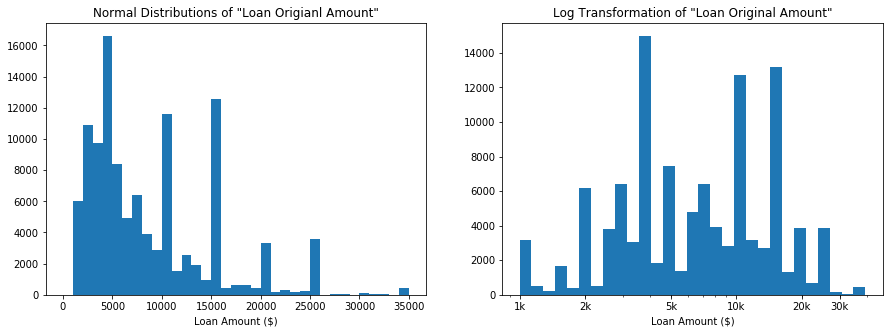

In [43]:
# set a default color
base_color = sb.color_palette()[0]
plt.figure(figsize=[15, 5])
# Left plot, normal plot without scale
plt.subplot(1,2,1)
binsize = 1000
lbins = np.arange(0, clean_loan_df['LoanOriginalAmount'].max()+binsize, binsize)

plt.hist(data=clean_loan_df, x='LoanOriginalAmount', bins=lbins)
plt.xlabel('Loan Amount ($)');
plt.title('Normal Distributions of "Loan Origianl Amount"')

# Right plot, log transformation of Loan original amount 
plt.subplot(1,2,2)
log_binsize = 0.055
bins = 10 ** np.arange(3, np.log10(clean_loan_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data=clean_loan_df, x='LoanOriginalAmount', bins=bins)
# sb.displot(data=loan_df, x='LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 3e4], ['1k', '2k', '5k', '10k', '20k', '30k'])
plt.xlabel('Loan Amount ($)')
plt.title('Log Transformation of "Loan Original Amount"');
plt.show()

**Observation:** The standard distribution of "Loan Original Amount" indicates a right skewed distribution of data, with the highest peak at 5,000 USD, and almost same peak around  10,000 USD and  15,000 USD. The majority of loan amount didn't excide 15,000 USD.

### Question: What is the distribution of stated monthly income?

In [44]:
plt.figure(figsize=[20,7])
# Left plot, normal distribution of "StatedMonthlyIncome"
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain')
plt.hist(data=clean_loan_df, x='StatedMonthlyIncome', bins = 30)
plt.xlabel('Stated Monthly Income ($)')
plt.xticks(rotation=50)
plt.title('Normal Distribution of Stated Monthly Income')

# Right plot, log transformation of "StatedMonthlyIncome"
plt.subplot(1,2,2)
tbins = 10**np.arange(0, 8.24+0.1, 0.1)
plt.hist(data=clean_loan_df, x='StatedMonthlyIncome', bins = tbins)
plt.ticklabel_format(style='plain')
plt.xscale('log')
plt.xticks([100, 500, 1000, 3000, 10000, 30000, 100000], [100, 500, '1k', '3k', '10k', '30k', '100k'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Log Distribution of Stated monthly Income')
plt.xlim(100, 100000)
plt.show();

**Observation** The normal distribution of the **StatedMonthlyIncome** shows it to be right skewed, after log transformation of the column, the distribution shows a Unimodal distribution of the data with the highest peak at around 5,000 USD.

### Question: What is the distribution of CreditScoreRange?

In [45]:
n_csr = clean_loan_df['CreditScoreRange'].value_counts().sum()
# Calculate the creditscorerange counts
csr_counts = clean_loan_df['CreditScoreRange'].value_counts()
csr_list = csr_counts.index

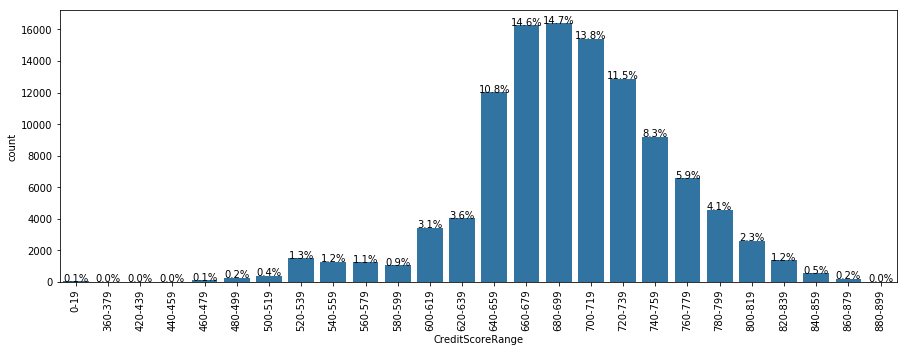

In [46]:
plt.figure(figsize=[15, 5])
sb.countplot(data= clean_loan_df, x='CreditScoreRange', color= base_color)
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = csr_counts[label.get_text()]
    pct_str = '{:0.1f}%'.format(100*count/n_csr)
    
    # print the anotation below the top of the bar
    plt.text(loc, count+2, pct_str, ha='center', color='black')

**Observation** The CreditScoreRange shows a left skewed distribution with less entries on Lower Credit Scores

### Question: What are the Distributions of Term, LoanStatus, EmploymentStatus, and ListingCatigories

In [47]:
# Compute the Propotions and value counts of LoanStatus, Term, and CreditScoreRange
term_counts = clean_loan_df.Term.value_counts()
term_counts_sum = clean_loan_df.Term.value_counts().sum()
max_term_counts = term_counts[0:1]
term_max_prop = max_term_counts / term_counts_sum

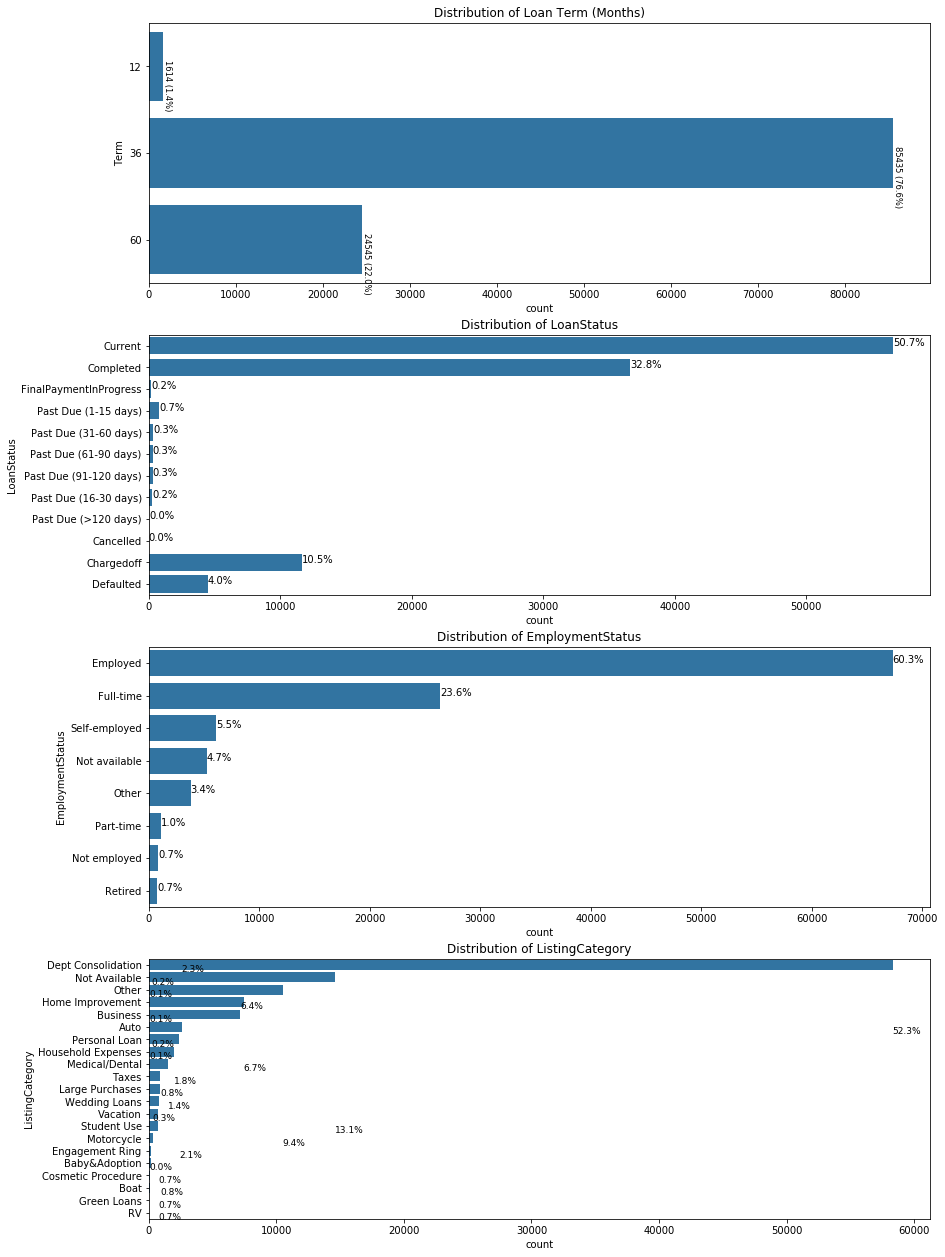

In [48]:
plt.figure(figsize=[14, 22])
plt.subplot(4,1,1)
sb.countplot(data=clean_loan_df, y='Term', color=base_color)
plt.title('Distribution of Loan Term (Months)')

locs, labels = plt.yticks() #location of ticks and labels
for loc, label in zip(locs, labels):
    termcount = term_counts[int(label.get_text())]
    pct_str = '{} ({:0.1f}%)'.format(termcount, 100*termcount/term_counts_sum)
    plt.text(y=loc, x=termcount, s=pct_str, va='baseline', rotation=270, fontsize='small')
    
plt.subplot(4,1,2)
sb.countplot(data = clean_loan_df, y = 'LoanStatus', color=base_color)
plt.title('Distribution of LoanStatus');

loan_count=clean_loan_df["LoanStatus"].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=loan_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/clean_loan_df.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')
    
plt.subplot(4,1,3)
sb.countplot(data = clean_loan_df, y = 'EmploymentStatus', color=base_color)
plt.title('Distribution of EmploymentStatus');

column_count=clean_loan_df["EmploymentStatus"].value_counts()
locs,labels=plt.yticks()
for loc,label in zip(locs,labels):
    count=column_count[label.get_text()]
    pct_string= "{:0.1f}%".format(100*count/clean_loan_df.shape[0])
    plt.text(y=loc, x=count, s=pct_string,ha="left",fontsize='medium')

plt.subplot(4,1,4)
# plt.figure(figsize=[10, 5])
list_count=clean_loan_df["ListingCategory"].value_counts()
list_order = list_count.index

sb.countplot(data = clean_loan_df, y = 'ListingCategory', color=base_color, order=list_order)
plt.title('Distribution of ListingCategory');

for i in range(list_count.shape[0]):
    count=list_count[i]
    pct_string='{:0.1f}%'.format(100*count/clean_loan_df.shape[0])
    plt.text(count,i,pct_string,va="top", fontsize=9) #{'center', 'top', 'bottom', 'baseline', 'center_baseline'}

**Observations:**

**Term:** The 36 months duration is the most choice with 76.7%, then the 12 months Loan Duration is the least with 12%.

**LoanStatus:** 50.3% of loans are in the current status, 33.0% of loans are completed, 10.5% of loans are charged off, and about 4% are defaulted.

**EmploymentStatus:** 60.1% of the borrowers are employed, then 0.8% are unemployed and 0.7% are retired

**ListingCategory:** The most common listing category is the Dept Consilidation, i.e., most of the borrowers borrwoed money to pay another dept. About 6.5% borrow the money to put it in a business.

In [49]:
clean_loan_df.head(5)

ListingKey Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  1021339766868145413AB3B   36  Completed      0.16516        0.1580   
1  10273602499503308B223C1   36    Current      0.12016        0.0920   
2  0EE9337825851032864889A   36  Completed      0.28269        0.2750   
3  0EF5356002482715299901A   36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2   36    Current      0.24614        0.2085   

    ListingCategory EmploymentStatus  IsBorrowerHomeowner  \
0     Not Available    Self-employed                 True   
1  Home Improvement         Employed                False   
2     Not Available    Not available                False   
3        Motorcycle         Employed                 True   
4  Home Improvement         Employed                 True   

   CurrentDelinquencies  StatedMonthlyIncome  LoanOriginalAmount  \
0                     2          3083.333333                9425   
1                     0          6125.000000               10000   
2                     1          2083.333333                3001   
3                     4          2875.000000               10000   
4                     0          9583.333333               15000   

   MonthlyLoanPayment  LP_InterestandFees  Investors CreditScoreRange  
0              330.43             1971.14        258          640-659  
1              318.93                0.00          1          680-699  
2              123.32             1185.63         41          480-499  
3              321.45             1052.11        158          800-819  
4              563.97             1256.63         20          680-699

### How is BorrowerAPR and BorrowerRate distributed?

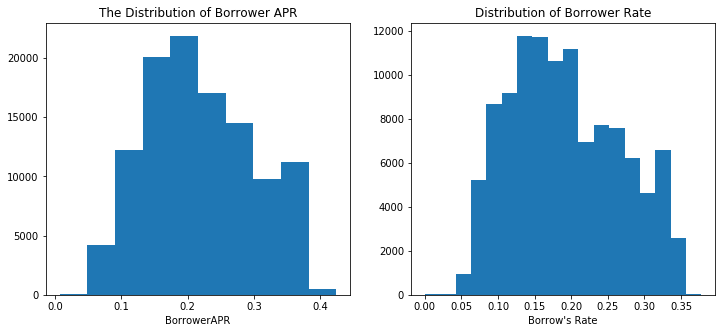

In [50]:
plt.figure(figsize=[12, 5])
plt.subplot(1,2,1) #Left plot, distribution of BorrowerAPR
bins = np.arange(0, clean_loan_df['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data=clean_loan_df, x='BorrowerAPR', color=base_color)
plt.xlabel('BorrowerAPR')
plt.title('The Distribution of Borrower APR')

plt.subplot(1,2,2) #Right plot, distribution of BorrowerRate
rate_bins = np.arange(0, clean_loan_df['BorrowerRate'].max()+0.021, 0.021)
plt.hist(data=clean_loan_df, x='BorrowerRate', bins=rate_bins, color=base_color)
plt.xlabel("Borrow's Rate")
plt.title('Distribution of Borrower Rate');

**Observation:** Both the BorrowerAPR and the Borrower's Rate have almost same distribution, I believe they'll correlate.

### Question: What is the distribution of the Current Delinquency?

In [51]:
# Compute the Propotions and value counts of Current Delinquency
# del_counts = clean_loan_df.CurrentDelinquencies.value_counts()
# n_del = clean_loan_df.CurrentDelinquencies.value_counts().sum()
# del_list = del_counts.index
# max_del_counts = del_counts[0:1]
# del_max_prop = max_del_counts / n_del

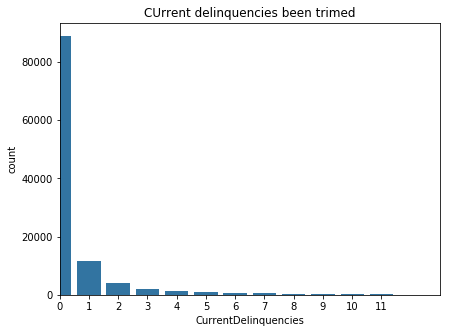

In [80]:
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
sb.countplot(data= clean_loan_df, x='CurrentDelinquencies', color= base_color)
plt.title('Full display of current delinquencies')

plt.subplot(1,2,2)
sb.countplot(data= clean_loan_df, x='CurrentDelinquencies', color= base_color)
plt.title('CUrrent delinquencies been trimed')
plt.xlim(0,13);

In [53]:
current_outliers = clean_loan_df['CurrentDelinquencies'] < 12

In [54]:
print(clean_loan_df.loc[current_outliers,:])

                     ListingKey Term              LoanStatus  BorrowerAPR  \
0       1021339766868145413AB3B   36               Completed      0.16516   
1       10273602499503308B223C1   36                 Current      0.12016   
2       0EE9337825851032864889A   36               Completed      0.28269   
3       0EF5356002482715299901A   36                 Current      0.12528   
4       0F023589499656230C5E3E2   36                 Current      0.24614   
5       0F05359734824199381F61D   60                 Current      0.15425   
6       0F0A3576754255009D63151   36                 Current      0.31032   
7       0F1035772717087366F9EA7   36                 Current      0.23939   
8       0F043596202561788EA13D5   36                 Current      0.07620   
9       0F043596202561788EA13D5   36                 Current      0.07620   
10      0F123545674891886D9F106   60                 Current      0.27462   
11      0F1734025150298088A5F2B   36               Completed      0.15033   

In [55]:
clean_loan_df = clean_loan_df.loc[current_outliers,:]

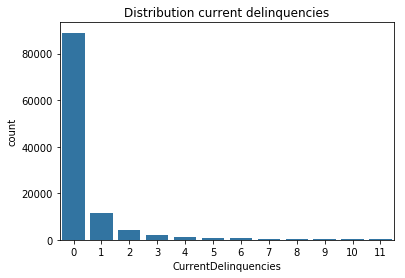

In [56]:
sb.countplot(data= clean_loan_df, x='CurrentDelinquencies', color= base_color)
plt.title('Distribution current delinquencies');

**Observation:** The current delinquencies distribution is skewed to the right, with most of the data on the right which are zeros, so I had to cut the xlim to 13. Majority of the current delinquencies is at 0.

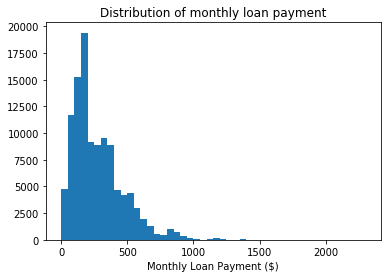

In [57]:
bins = np.arange(0, clean_loan_df['MonthlyLoanPayment'].max()+50, 50)
plt.hist(data=clean_loan_df, x='MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.title('Distribution of monthly loan payment');
# plt.xlim(0,1600);

In [58]:
# Check for outliers in the "MonthlyLoanPayment" column
monthly_loan_outliers = (clean_loan_df['MonthlyLoanPayment'] < 1500)

In [59]:
print(clean_loan_df.loc[monthly_loan_outliers,:])

                     ListingKey Term              LoanStatus  BorrowerAPR  \
0       1021339766868145413AB3B   36               Completed      0.16516   
1       10273602499503308B223C1   36                 Current      0.12016   
2       0EE9337825851032864889A   36               Completed      0.28269   
3       0EF5356002482715299901A   36                 Current      0.12528   
4       0F023589499656230C5E3E2   36                 Current      0.24614   
5       0F05359734824199381F61D   60                 Current      0.15425   
6       0F0A3576754255009D63151   36                 Current      0.31032   
7       0F1035772717087366F9EA7   36                 Current      0.23939   
8       0F043596202561788EA13D5   36                 Current      0.07620   
9       0F043596202561788EA13D5   36                 Current      0.07620   
10      0F123545674891886D9F106   60                 Current      0.27462   
11      0F1734025150298088A5F2B   36               Completed      0.15033   

In [60]:
# Drop the outliers
clean_loan_df = clean_loan_df.loc[monthly_loan_outliers,:]

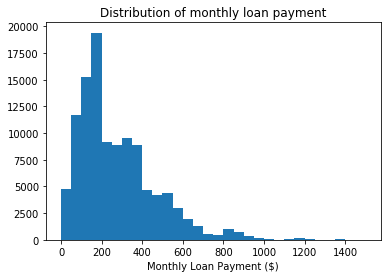

In [61]:
# Re-plot the "MonthlyLoanPayment"
bins = np.arange(0, clean_loan_df['MonthlyLoanPayment'].max()+50, 50)
plt.hist(data=clean_loan_df, x='MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.title('Distribution of monthly loan payment');

**Observation:** The distribution of monthly month payment is right skewed, with the highest peak around 200 USD

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The current delinquencies distribution is skewed to the right, with most of the data on the right which are zeros, so I had to remove the outliers. Majority of the current delinquencies is at 0.

> The standard distribution of "Loan Original Amount" indicates a right skewed distribution of data, with the highest peak at 5,000 USD, and almost same peak around 10,000 USD and 15,000 USD. The majority of loan amount didn't excide 15,000 USD.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The CreditScoreRangeUpper and CreditScoreRange lower was merged to form a single Column CreditScoreRange

## Bivariate Exploration
<a id="bivariate"></a>

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [62]:
clean_loan_df.head()

ListingKey Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  1021339766868145413AB3B   36  Completed      0.16516        0.1580   
1  10273602499503308B223C1   36    Current      0.12016        0.0920   
2  0EE9337825851032864889A   36  Completed      0.28269        0.2750   
3  0EF5356002482715299901A   36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2   36    Current      0.24614        0.2085   

    ListingCategory EmploymentStatus  IsBorrowerHomeowner  \
0     Not Available    Self-employed                 True   
1  Home Improvement         Employed                False   
2     Not Available    Not available                False   
3        Motorcycle         Employed                 True   
4  Home Improvement         Employed                 True   

   CurrentDelinquencies  StatedMonthlyIncome  LoanOriginalAmount  \
0                     2          3083.333333                9425   
1                     0          6125.000000               10000   
2                     1          2083.333333                3001   
3                     4          2875.000000               10000   
4                     0          9583.333333               15000   

   MonthlyLoanPayment  LP_InterestandFees  Investors CreditScoreRange  
0              330.43             1971.14        258          640-659  
1              318.93                0.00          1          680-699  
2              123.32             1185.63         41          480-499  
3              321.45             1052.11        158          800-819  
4              563.97             1256.63         20          680-699

In [63]:
clean_loan_df.dtypes

ListingKey                object
Term                    category
LoanStatus              category
BorrowerAPR              float64
BorrowerRate             float64
ListingCategory         category
EmploymentStatus        category
IsBorrowerHomeowner         bool
CurrentDelinquencies       int64
StatedMonthlyIncome      float64
LoanOriginalAmount         int64
MonthlyLoanPayment       float64
LP_InterestandFees       float64
Investors                  int64
CreditScoreRange        category
dtype: object

In [64]:
# # Since the data has a lot of rows, I'll randomly pick 2500 samples to create a dataframe
# samples = np.random.choice(clean_loan_df.shape[0], 2500, replace=False)
# sample_loan_df = clean_loan_df.loc[samples,:]

To start off with, I want to look at the pairwise correlations present between features in the data.

In [65]:
numerical_vars = ['BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_InterestandFees', 'Investors']
categorical_vars = ['Term', 'LoanStatus', 'CurrentDelinquencies', 'ListingCategory', 'EmploymentStatus', 'CreditScoreRange']

In [66]:
# Correlation Plot
plt.figure(figsize=[8,5])
sb.heatmap(clean_loan_df[numerical_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.show()

There is a strong correlation between BorrowerAPR and BorrowerRate, and between LoanOriginalAmount and MonthlyLoanPayment. The other variables don't seems to have strong correlation with other numerical variables

#### Relationshipe between BorrowerRate VS (Term and CreditScoreRange)

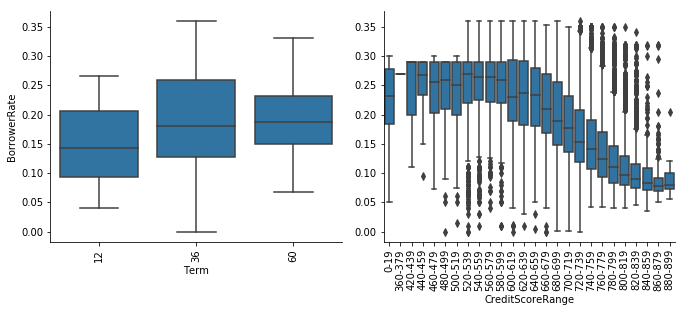

In [67]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = clean_loan_df, y_vars = ['BorrowerRate'], x_vars = ['Term', 'CreditScoreRange'], 
                size = 4, aspect = 1.2)
g.map(boxgrid);
plt.show();

**Observation:**
> **Term** shows a positive interaction with **BorrowerRate**, the higher the term, the higher the borrower rate.

> **CreditScoreRange** shows a ceiling from 0-639 then it started declining for the higher credit scores, means those with lower credit score get higher borrower rate.

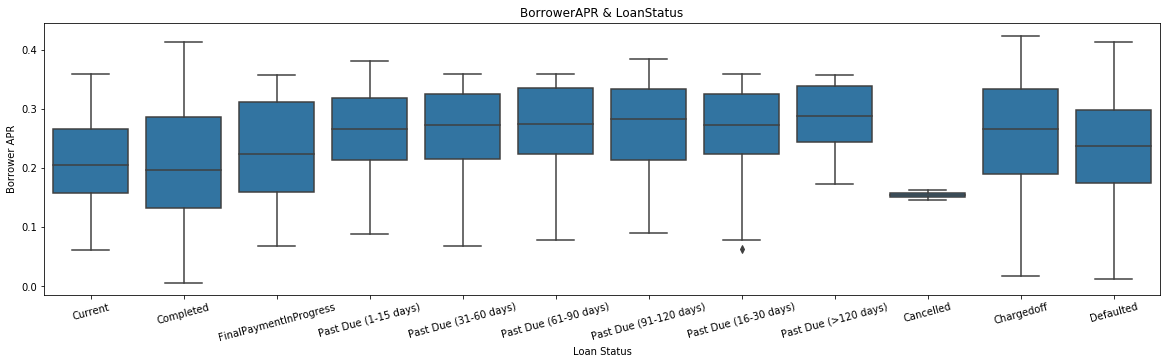

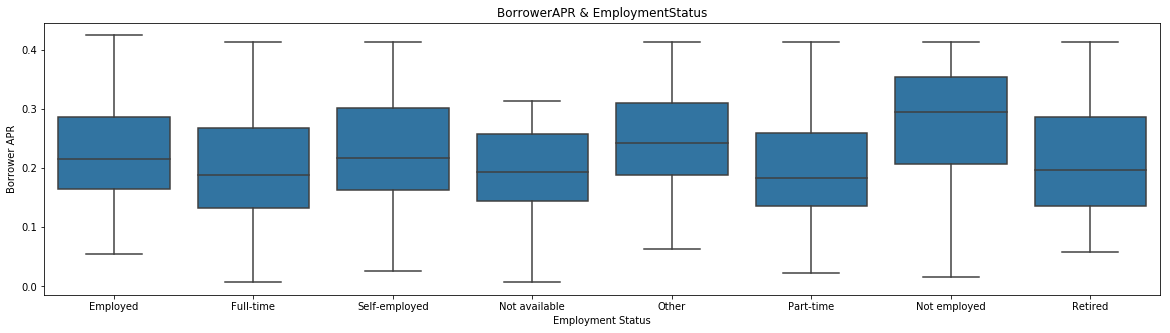

In [68]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
sb.boxplot(data= clean_loan_df,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=clean_loan_df, y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

**Observation:**
> BorrowerAPR vs LoanStatus graph we notice that Current and completed loans have lower rate than the past-due loans and have lower mean.

> On Borrower APR vs Employment status graph we notice that **Employed people** have lower IQR than those who are **not employed**.

In [69]:
clean_loan_df.head(5)

ListingKey Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  1021339766868145413AB3B   36  Completed      0.16516        0.1580   
1  10273602499503308B223C1   36    Current      0.12016        0.0920   
2  0EE9337825851032864889A   36  Completed      0.28269        0.2750   
3  0EF5356002482715299901A   36    Current      0.12528        0.0974   
4  0F023589499656230C5E3E2   36    Current      0.24614        0.2085   

    ListingCategory EmploymentStatus  IsBorrowerHomeowner  \
0     Not Available    Self-employed                 True   
1  Home Improvement         Employed                False   
2     Not Available    Not available                False   
3        Motorcycle         Employed                 True   
4  Home Improvement         Employed                 True   

   CurrentDelinquencies  StatedMonthlyIncome  LoanOriginalAmount  \
0                     2          3083.333333                9425   
1                     0          6125.000000               10000   
2                     1          2083.333333                3001   
3                     4          2875.000000               10000   
4                     0          9583.333333               15000   

   MonthlyLoanPayment  LP_InterestandFees  Investors CreditScoreRange  
0              330.43             1971.14        258          640-659  
1              318.93                0.00          1          680-699  
2              123.32             1185.63         41          480-499  
3              321.45             1052.11        158          800-819  
4              563.97             1256.63         20          680-699

#### BorrowerAPR Interations with Quantitative Variables

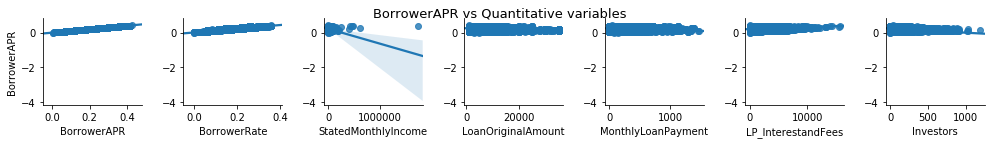

In [70]:
g = sb.PairGrid(data = clean_loan_df, y_vars = ['BorrowerAPR'], 
                x_vars = numerical_vars, size = 2)
g.map(sb.regplot)
plt.suptitle('BorrowerAPR vs Quantitative variables', fontsize=13)

plt.show();

**Observation:**
> **StatedMonthlyIncome** shows a nagative relation with BorrowerAPR, which indicates increase in BorrowerAPR leads to decress in StatedMonthlyIncome, which implies a motivation to higher income earners to borrow more.

> **LoanOriginalAmount**, and **MonthlyLoanPayment** both shows a slightly nagative relationship with BorrowerAPR. 

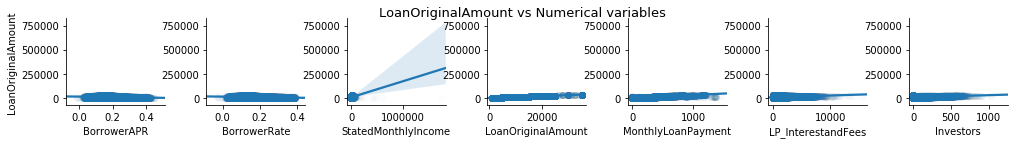

In [71]:
plt.figure(figsize=[50,40])
g = sb.PairGrid(data = clean_loan_df, y_vars = ['LoanOriginalAmount'], 
                x_vars = numerical_vars, size = 2)
g.map(sb.regplot, scatter_kws={'alpha': 0.01}, x_jitter=0.04)
plt.suptitle('LoanOriginalAmount vs Numerical variables', fontsize=13)
plt.show();

**Observations:**
> **StatedMonthlyIncome** Shows a positive correlation with **LoanOriginalAmount**, which indicate that borrower's with high monthly income tend to take higher loan amount.

> **MonthlyLoanPayment** also shows a positive relationship with the LoanOriginalAmount, which indicate that the higher the loan amount the higher the monthly loan payment will be. SO also applies to **LP_InterestandFees** and **Investors**.

In [72]:
# Create Sample plots for simple visualisation of the most relevant LoanStatus
loan_status = ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Past Due (1-15 days)']
loanstatus_df = clean_loan_df[clean_loan_df['LoanStatus'].isin(loan_status)]
loanstatus_df.reset_index(drop=True, inplace=True)
loanstatus_df['LoanStatus'] = loanstatus_df['LoanStatus'].astype('object')
print(loanstatus_df.LoanStatus.unique())
print(loanstatus_df.shape)

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'FinalPaymentInProgress']
(109651, 15)


In [73]:
# Create dataframe containing value proportions
df1 = loanstatus_df.groupby(['EmploymentStatus', 'LoanStatus'])['LoanStatus'].count()
df2 = df1.groupby(level=0).apply(lambda x: 100 * x/x.sum()).reset_index(name='Proportion')

df3 = clean_loan_df.groupby(['LoanStatus', 'CreditScoreRange'])['CreditScoreRange'].count()
df4 = df3.groupby(level=0).apply(lambda x: 100 * x/x.sum()).reset_index(name='Proportion')

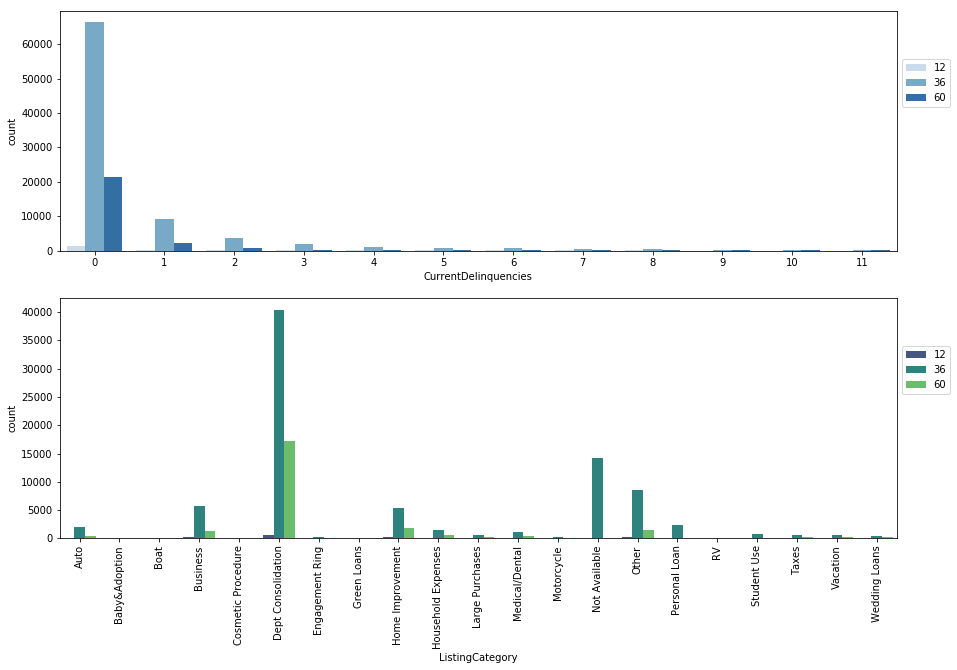

In [74]:
# Create Bivariate plots of Categorical variables; EmploymentStatus, Term, CreditScoreRange, CurrentDelinquencies
plt.figure(figsize = [15, 15])

# subplot 1: CurrentDelinquencies vs Term
plt.subplot(3, 1, 1)
sb.countplot(data = clean_loan_df, x = 'CurrentDelinquencies', hue = 'Term', palette = 'Blues')
plt.legend(loc=6, bbox_to_anchor=(1.0,0.7));

# subplot 2: ListingCategory vs Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = clean_loan_df, x = 'ListingCategory', hue = 'Term', palette = 'viridis')
plt.xticks(rotation=90)
ax = plt.legend(loc=6, bbox_to_anchor=(1.0,0.7)); # re-arrange legend to reduce overlapping



In [75]:
# subplot 3: EmploymentStatus vs CreditScoreRange
# ax = plt.subplot(4, 1, 3)
# sb.barplot(data = df4, hue= 'LoanStatus', x= 'CreditScoreRange',y='Proportion', palette = 'deep')
# plt.xticks(rotation=90)
# ax = plt.legend(loc=6, bbox_to_anchor=(1.0,0.4)); 
plt.figure(figsize = [15, 15])
ax = plt.subplot(3, 1, 3) # EmploymentStatus vs LoanStatus
sb.barplot(data=df2, x= 'EmploymentStatus', y= 'Proportion', hue='LoanStatus', palette='PuOr')
ax = plt.legend(loc=6, bbox_to_anchor=(1.0,0.4)); 

plt.show()

In [76]:
plt.figure(figsize=[15,20])
ax = plt.subplot(3, 1, 2)
sb.barplot(data = df4, hue= 'LoanStatus', x= 'CreditScoreRange',y='Proportion', palette = 'deep')
plt.xticks(rotation=90)
ax = plt.legend(loc=6, bbox_to_anchor=(1.0,0.4)); 

**Observations:**
> **CurrentDelinquencies** vs. **Term** shows a right skewed distribution of data, the month term of 36 is the most popular duration followed by the 60 term duration, the 12 term is the lowest of them all. So also it applies to **ListingCategory** 

> **EmploymentStatus** vs. **LoanStatus** most of the **Employed**, **Other** and **SelfEmployed** categories of the **EmploymentStatus**, their **LoanStatus** is on the **Current** level, while most of the **Full-Time**, **NotAvailable**, **NotEmployed**, **PartTime** and **Retired** categories have completed their loan.

> **CreditRangeScore** vs. **LoanStatus** most of the higher creditratescores have a very bad loan outcome i.e., charged-off, defaulted, past dues.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. LoanOriginalAmount, and MonthlyLoanPayment both shows a slightly nagative relationship with BorrowerAPR.
> 2. Most of the Employed, Other and SelfEmployed categories of the EmploymentStatus, their LoanStatus is on the Current level, while most of the Full-Time, NotAvailable, NotEmployed, PartTime and Retired categories have completed their loan.
> 4. Most of the higher creditratescores have a very bad loan outcome i.e., charged-off, defaulted, past dues.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. CurrentDelinquencies vs. Term shows a right skewed distribution of data, the month term of 36 is the most popular duration followed by the 60 months term duration, the 12 term is the lowest of them all. 
2. StatedMonthlyIncome Shows a positive correlation with LoanOriginalAmount, which indicate that borrower's with high monthly income tend to take higher loan amount.

## Multivariate Exploration
<a id="multivariate"></a>
> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [77]:
# Plot the levels of LoanStatus across EmploymentStatus and observe it's effect on BorrowerAPR.
# I will only be working with the most importatant LoanStatuss i.e(Chargedoff, Completed, Current, Defaulted, FinalPaymentsinProgress, PastDue(1-15 days))
plt.figure(figsize=[12,5])
sb.pointplot(data=loanstatus_df, y='BorrowerAPR', x='CreditScoreRange', hue='LoanStatus', dodge=True, linestyles='', palette='deep')
plt.title('BorrowerAPR vs CreditScoreRange vs LoanStatus')
plt.legend(loc=6, bbox_to_anchor=(1.0,0.6))
plt.xticks(rotation=90);

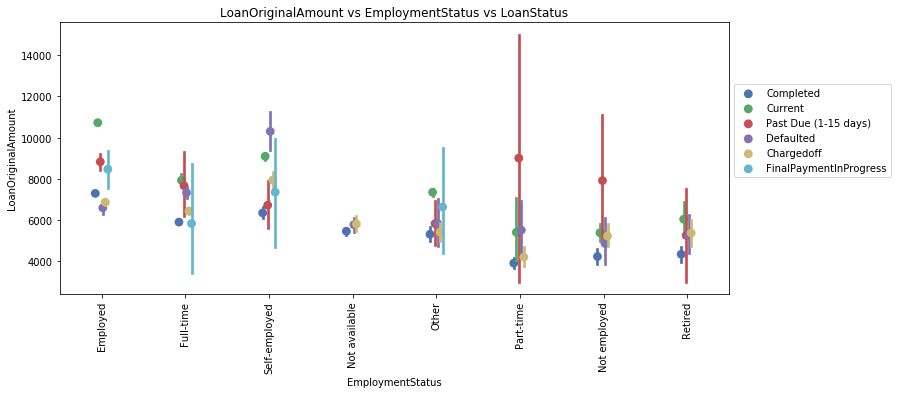

In [78]:
plt.figure(figsize=[12,5])
sb.pointplot(data=loanstatus_df, y='LoanOriginalAmount', x='EmploymentStatus', hue='LoanStatus', dodge=True, linestyles='', palette='deep')
plt.title('LoanOriginalAmount vs EmploymentStatus vs LoanStatus')
plt.legend(loc=6, bbox_to_anchor=(1.0,0.6))
plt.xticks(rotation=90);

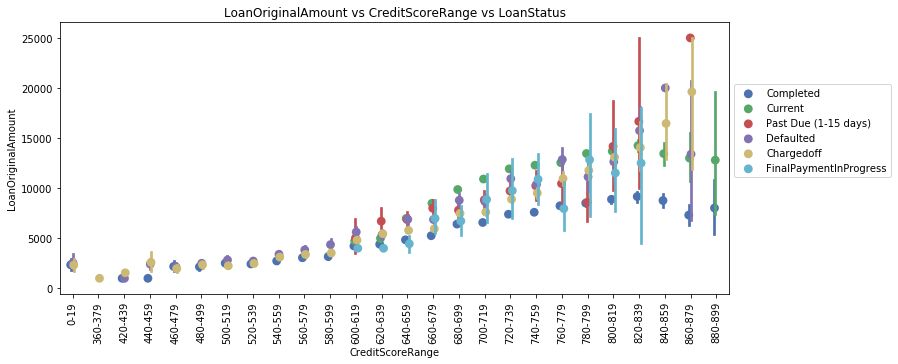

In [79]:
plt.figure(figsize=[12,5])
sb.pointplot(data=loanstatus_df, y='LoanOriginalAmount', x='CreditScoreRange', hue='LoanStatus', dodge=True, linestyles='', palette='deep')
plt.title('LoanOriginalAmount vs CreditScoreRange vs LoanStatus')
plt.legend(loc=6, bbox_to_anchor=(1.0,0.6))
plt.xticks(rotation=90);

**Observation** 
1. Most of the completed loans are less than $6,000
2. The number of Chargedoff loans increases as the number of CreditScoreRange increases

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After more investigations, I found out that most of the completed loans are less than 6,000 USD and also the number of chargedoff loans increases as the number of credit score increases that's to say that borrowers with higher credit scores are likely not to pay their loans.

### Were there any interesting or surprising interactions between features?

> Not really, just the high correlation between MonthlyLoanPayment and OriginalLoanAmount.

## Conclusions
<a id="conclusion"></a>
>I investigated LoanStatus, BorrowerAPR, LoanOriginalAmount, EmploymentStatus, to find out what factor(s) is responsible for a loan status outcome and I found out that most of the loans that are completed tends to have lesser amount and also the number of credit score have impact on loan status outcome, borrowers with higher credit scores are likely not to pay their loans. 